# Finding the best restaurants in Bangalore

### Importing the necessary modules

In [288]:
import pandas as pd
import numpy as np

## Loading and exploring the dataset

In [290]:
df=pd.read_csv('C:/Users/Dell/Desktop/Data_Analysis/zomato.csv')

In [291]:
df.head(10)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8/5,286,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
6,https://www.zomato.com/bangalore/rosewood-inte...,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,+91 9731716688\r\n080 26740366,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",[],Buffet,Banashankari
7,https://www.zomato.com/bangalore/onesta-banash...,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6/5,2556,080 48653961\r\n080 48655715,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari
8,https://www.zomato.com/bangalore/penthouse-caf...,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Penthouse Cafe,Yes,No,4.0/5,324,+91 8884135549\r\n+91 9449449316,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes,Banashankari
9,https://www.zomato.com/bangalore/smacznego-ban...,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,Yes,No,4.2/5,504,+91 9945230807\r\n+91 9743804471,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari


In [293]:
df.tail(10)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
51707,https://www.zomato.com/bangalore/m-bar-bengalu...,"Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...",M Bar - Bengaluru Marriott Hotel Whitefield,No,No,3.9 /5,77,080 49435000,Whitefield,"Fine Dining, Bar",Rooftop Ambience,Finger Food,"2,000","[('Rated 4.0', 'RATED\n Went there post dinne...",[],Pubs and bars,Whitefield
51708,https://www.zomato.com/bangalore/keys-cafe-key...,"Keys Hotel, 6, 1st Phase Industrial Area, Near...",Keys Cafe - Keys Hotel,No,No,2.8 /5,161,080 39451000\n+91 8884038484,Whitefield,"Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian","1,200","[('Rated 3.0', 'RATED\n Place is good not tha...",[],Pubs and bars,Whitefield
51709,https://www.zomato.com/bangalore/the-farm-hous...,"136, SAP Labs India, KIADB Export Promotion In...",The Farm House Bar n Grill,No,No,3.7 /5,34,+91 9980121279\n+91 9900240646,Whitefield,"Casual Dining, Bar",NaN,"North Indian, Continental",800,"[('Rated 4.0', 'RATED\n Ambience- Big and spa...",[],Pubs and bars,Whitefield
51710,https://www.zomato.com/bangalore/topsy-turvey-...,"2E2, 4th Cross Road, Devasandra Industrial Est...",Topsy Turvey,No,No,NaN,0,+91 9148155994,Whitefield,Bar,NaN,Finger Food,900,"[('Rated 4.0', ""RATED\n A divine joint for Fl...",[],Pubs and bars,Whitefield
51711,https://www.zomato.com/bangalore/bhagini-2-whi...,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,2.5 /5,81,080 65951222,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield
51716,https://www.zomato.com/bangalore/the-nest-the-...,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4 /5,13,+91 8071117272,"ITPL Main Road, Whitefield","Bar, Casual Dining",NaN,"Finger Food, North Indian, Continental","1,500","[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield


In [294]:
df.count()

url                            51717
address                        51717
name                           51717
online_order                   51717
book_table                     51717
rate                           43942
votes                          51717
phone                          50509
location                       51696
rest_type                      51490
dish_liked                     23639
cuisines                       51672
approx_cost(for two people)    51371
reviews_list                   51717
menu_item                      51717
listed_in(type)                51717
listed_in(city)                51717
dtype: int64

#### The names of columns are a bit non descriptive and confusing so its better to rename some of these columns.

In [295]:
df.rename(columns={'approx_cost(for two people)': 'two_people_cost', 'listed_in(type)':'table_service', 
                   'listed_in(city)':'locations'}, inplace=True)

#### The url and phone number of the restaurants can't justify their ratings or reviews. So, we drop these unnecessary features

In [296]:
df.drop(columns=['url','phone'] , inplace=True)

In [297]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,two_people_cost,reviews_list,menu_item,table_service,locations
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## Cleaning the dataset

In [298]:
df.count()

address            51717
name               51717
online_order       51717
book_table         51717
rate               43942
votes              51717
location           51696
rest_type          51490
dish_liked         23639
cuisines           51672
two_people_cost    51371
reviews_list       51717
menu_item          51717
table_service      51717
locations          51717
dtype: int64

#### Replace the unknown rating i.e "-" and "NEW" to null.

In [299]:
df['rate']=df['rate'].replace('NEW',np.nan)
df['rate']=df['rate'].replace('-',np.nan)
df.dropna(how='any',inplace=True)
df['rate'] = df.loc[:,'rate'].replace('[ ]','',regex = True)

In [300]:
df.count()

address            23259
name               23259
online_order       23259
book_table         23259
rate               23259
votes              23259
location           23259
rest_type          23259
dish_liked         23259
cuisines           23259
two_people_cost    23259
reviews_list       23259
menu_item          23259
table_service      23259
locations          23259
dtype: int64

#### As can be seen the rate column is string type with an extra "/5" with all the ratings. This should be cleaned. Later, It is important to convert the string back to float !!

In [301]:
df['rate']=df['rate'].astype(str)
df['rate']=df['rate'].apply(lambda x : x.replace('/5',''))
df['rate']=df['rate'].apply(lambda x : float(x))
df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [302]:
df['two_people_cost'].tail(5)

51705    1,200
51707    2,000
51708    1,200
51711      800
51715    2,500
Name: two_people_cost, dtype: object

#### As can be seen the two_people_cost is object type column consist of comma i.e " , " with most of the costs. This comma should be cleaned. 

In [303]:
df['two_people_cost']=df['two_people_cost'].str.replace(',','')
df['two_people_cost'].tail()

51705    1200
51707    2000
51708    1200
51711     800
51715    2500
Name: two_people_cost, dtype: object

In [307]:
df['two_people_cost'] = df['two_people_cost'].astype(int)
df['two_people_cost'].dtypes

dtype('int32')

In [308]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,two_people_cost,reviews_list,menu_item,table_service,locations
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## Data Visualization

#### Are the locations of restaurants localised to specific parts of city?

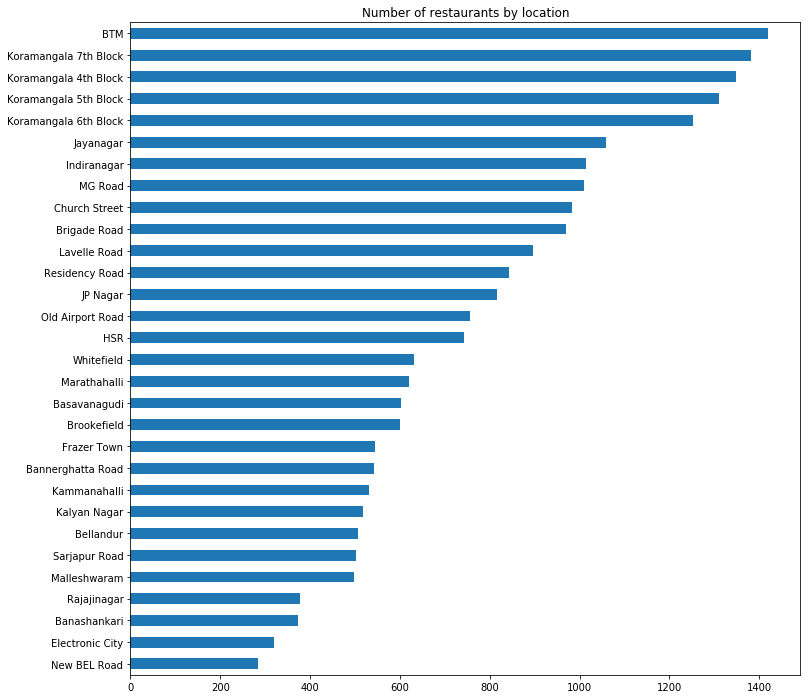

In [309]:
df['locations'].value_counts().sort_values().plot(kind='barh', figsize=(12,12), title='Number of restaurants by location')

#### Is there a relation between online order option and rating of the restaurant?

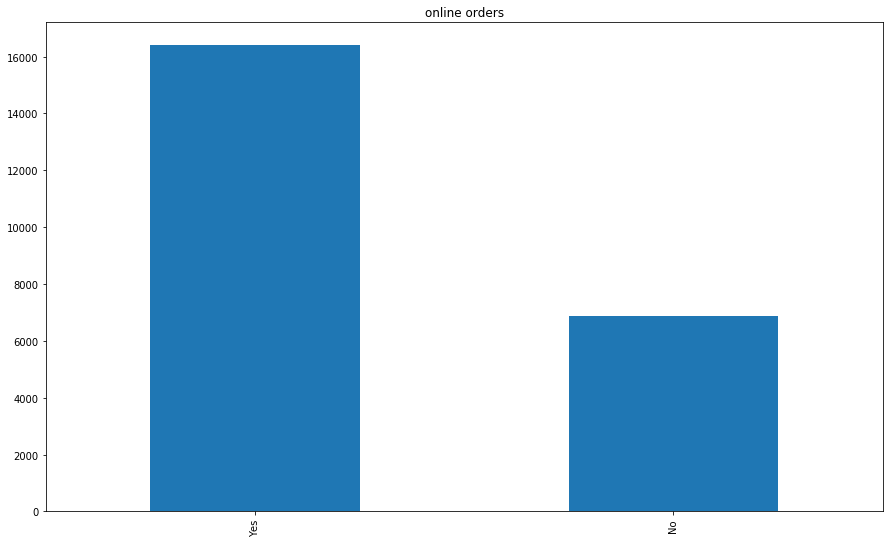

In [310]:
df['online_order'].value_counts().plot(kind='bar', title='online orders')

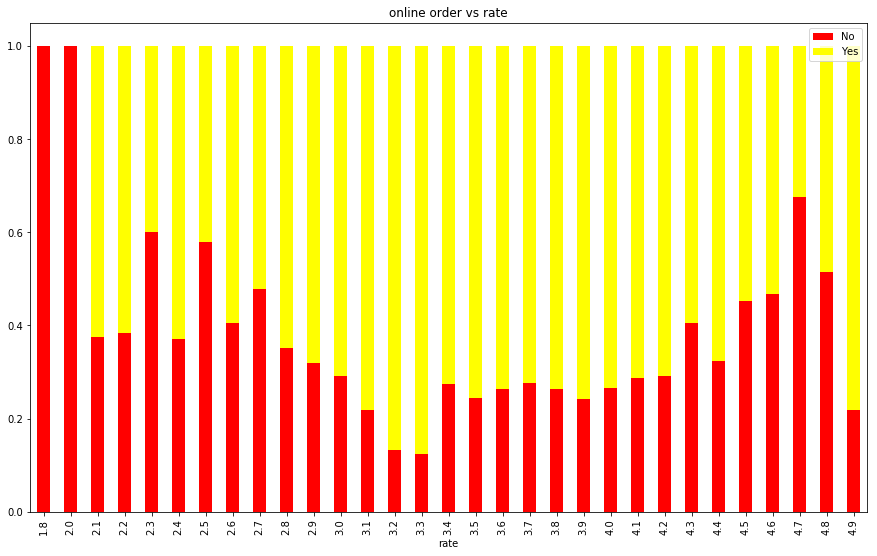

In [311]:
x = pd.crosstab(df['rate'], df['online_order'])
x.div(x.sum(1).astype(float), axis = 0 ).plot(kind = 'bar', stacked = True,color=['red','yellow'])
plt.title('online order vs rate')
plt.legend(loc="upper right")
plt.show()

#### Restaurants are more likely to receive a higher rating if they offers online order option.

#### Is there a relation between table booking option and rating of the restaurant?

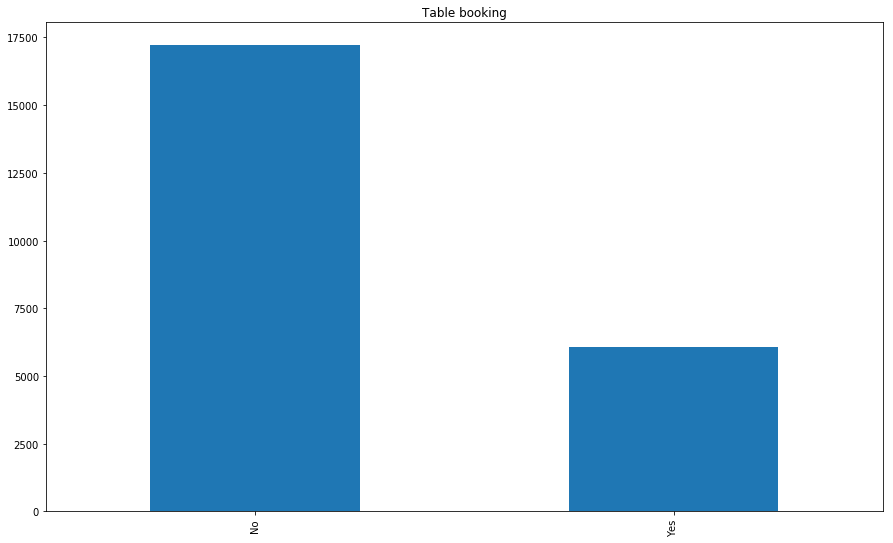

In [312]:
df['book_table'].value_counts().plot(kind='bar', title='Table booking' )

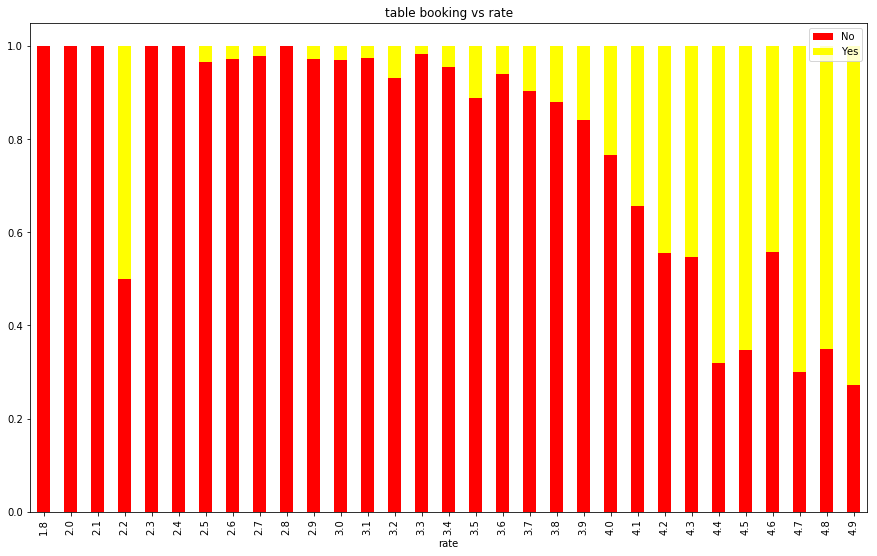

In [313]:
x = pd.crosstab(df['rate'], df['book_table'])
x.div(x.sum(1).astype(float), axis = 0 ).plot(kind = 'bar', stacked = True,color=['red','yellow'])
plt.title('table booking vs rate')
plt.legend(loc="upper right")
plt.show()

#### It can be said that the table booking option majorly happens with the Highly rated restaurants.

In [314]:
bins=[0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000]
df['costbins']=pd.cut(df['two_people_cost'],bins)

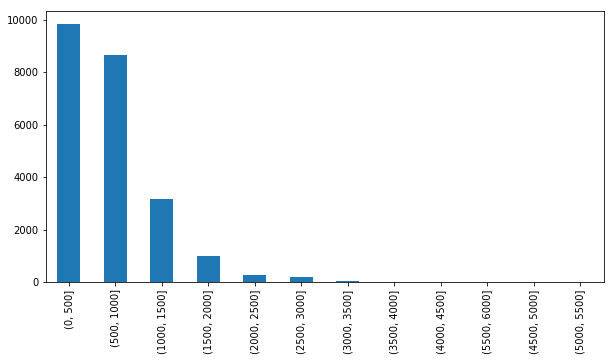

In [315]:
df['costbins'].value_counts().plot(kind = 'bar', figsize = (10,5))

####  The highest frequency for cost of two people is around 800

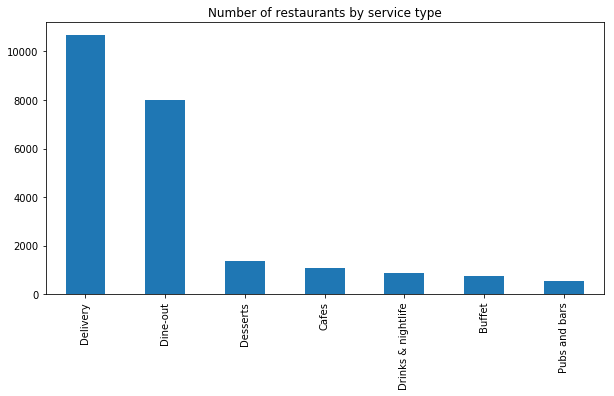

In [316]:
df['table_service'].value_counts().plot(kind = 'bar',figsize = (10,5),title = 'Number of restaurants by service type')

#### It is seen that Delivery is the most popular service type followed by Dine-Out

## Finding the best restaurants

#### The criteria for best restaurants would be cheapest and highly rated

In [317]:
data=df.loc[(df['book_table']=='Yes') & (df['rate']>4.0),['name','rate','two_people_cost','locations','book_table','address']]
data.head(10)

,name,rate,two_people_cost,locations,book_table,address
0,Jalsa,4.1,800,Banashankari,Yes,"942, 21st Main Road, 2nd Stage, Banashankari, ..."
7,Onesta,4.6,600,Banashankari,Yes,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp..."
11,Cafe Shuffle,4.2,600,Banashankari,Yes,"941, 3rd FLOOR, 21st Main, 22nd Cross, Banasha..."
12,The Coffee Shack,4.2,500,Banashankari,Yes,"6th Block, 3rd Stage, Banashankari, Bangalore"
44,Onesta,4.6,600,Banashankari,Yes,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp..."
57,Wamama,4.2,800,Banashankari,Yes,"2466, Bhaskar Grand Tower, 24th Cross, Opposit..."
148,Sri Udupi Food Hub,4.1,500,Banashankari,Yes,"155, 43rd Cross Road, 8th Block, Jayanagar, Ba..."
166,Patio 805,4.1,1200,Banashankari,Yes,"805, Ground Floor, 35C Cross, 9th Main, 4th Bl..."
207,Chutney Chang,4.1,1500,Banashankari,Yes,"Cosmopolitan Club, 22nd Cross, 3rd Block, Jaya..."
217,Toscano,4.3,1300,Banashankari,Yes,"359/38,Next to Fabindia, 7th Cross, 1st Block,..."


In [318]:
best_restaurants = data.loc[(data['rate'] > 4.5) & (data['two_people_cost'] < 1000), ['name','rate', 'two_people_cost']]
best_restaurants

,name,rate,two_people_cost
7,Onesta,4.6,600
44,Onesta,4.6,600
557,Onesta,4.6,600
2497,Onesta,4.6,600
2584,Onesta,4.6,600
3293,Onesta,4.6,600
6995,Onesta,4.6,600
16975,Baar Union,4.6,850
17490,Baar Union,4.6,850
17501,Baar Union,4.6,850


In [319]:
best_restaurants['name'].unique()

array(['Onesta', 'Baar Union', 'Zamindar'], dtype=object)

In [320]:
best_restaurants['two_people_cost'].unique()

array([600, 850, 800], dtype=int64)

### Conclusion : Onesta, Baar Union and Zamindar are the three top rated (rating > 4.5) and cheapest resaturants (cost for two people of 600,850 and 800 respectively) 